In [2]:
# BRICS 使用教程 https://www.blopig.com/blog/2023/03/brics-decomposition-and-synthetic-accessibility/

from rdkit import Chem
from rdkit.Chem import BRICS
from rdkit.Chem import Draw
import random
from rdkit.Chem import RDConfig
import os
import sys
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
import sascorer

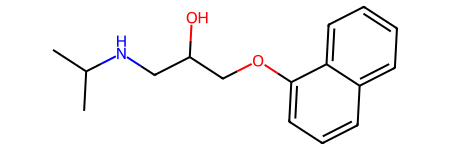

In [4]:
m = Chem.MolFromSmiles('CC(NCC(O)COC1=CC=CC2=CC=CC=C21)C')
m

Now we can fragment the compound based on BRICS rules frm the RDKit.Chem module, BRICS.

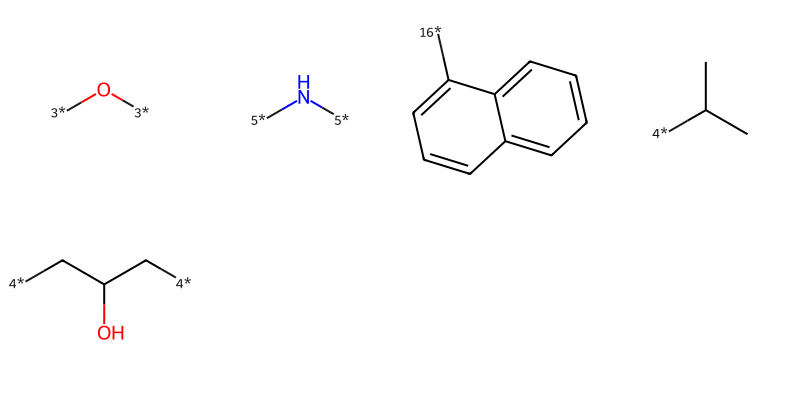

In [5]:
frags = list(Chem.BRICS.BRICSDecompose(m))
mols = [Chem.MolFromSmiles(x) for x in frags]
Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200))

Notice the numbers of the dummy atoms follow with the notation from the original paper. Dummy atom 16 always extends off an aromatic ring system. Dummy atom 4 always connects to a carbon atom which is also attached to either a carbon or hydrogen atom. Dummy atom 3 always connects to an oxygen and dummy atom 5 always connects to an sp3 nitrogen atom.

A cool functionality that RDKit provides is the recomposition of fragments with the BRICS.BRICSBuild function. Lets look at all the possible combinations.

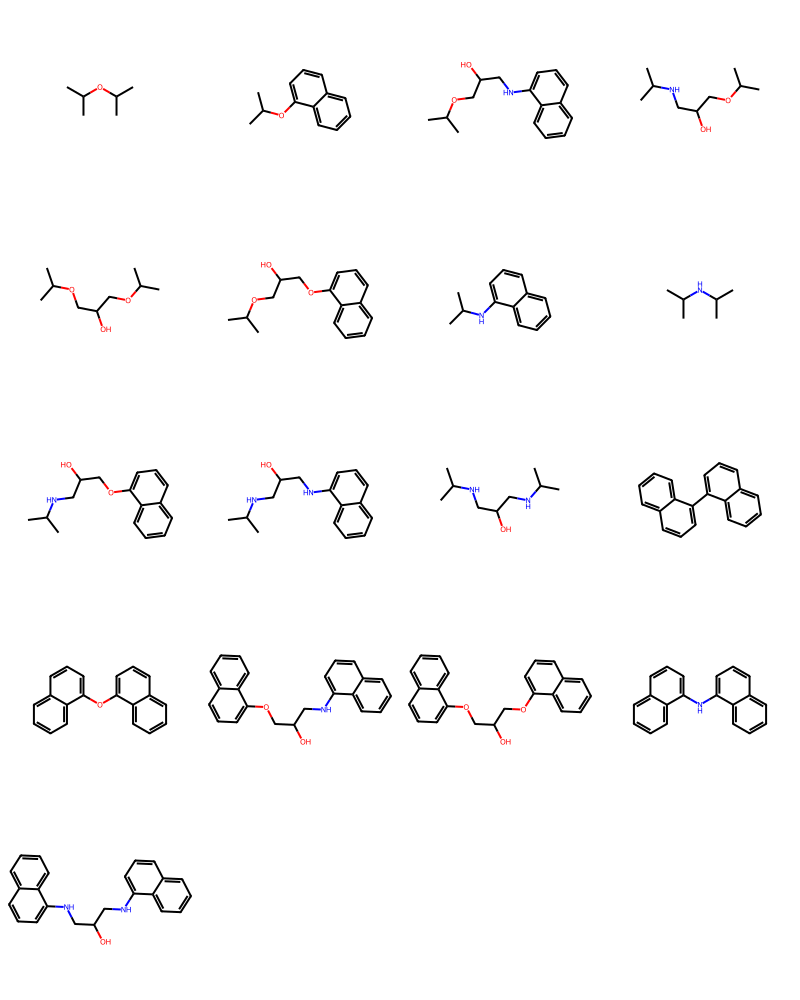

In [6]:
build = BRICS.BRICSBuild(mols)
random.seed(90)
prods = [next(build) for x in range(17)]
Draw.MolsToGridImage(prods, molsPerRow=4, subImgSize=(200, 200))

这里我选择了17代化合物。我必须通过不同的范围进行测试，以找到生成器在给定片段的情况下可以返回的最多组合数量。其中一些化合物看起来很难合成（双环系统用单键连接）。让我们通过 RDKit 提供的合成可访问性过滤器来运行它们。

In [7]:
sa_scores = [sascorer.calculateScore(x) for x in prods]
Draw.MolsToGridImage(prods, molsPerRow=4, subImgSize=(200, 200), legends=["%.2f"%x for x in sa_scores])

[11:38:43] 

****
Pre-condition Violation
getNumImplicitHs() called without preceding call to calcImplicitValence()
Violation occurred on line 297 in file /project/build/temp.linux-x86_64-cpython-38/rdkit/Code/GraphMol/Atom.cpp
Failed Expression: d_implicitValence > -1
****



RuntimeError: Pre-condition Violation
	getNumImplicitHs() called without preceding call to calcImplicitValence()
	Violation occurred on line 297 in file Code/GraphMol/Atom.cpp
	Failed Expression: d_implicitValence > -1
	RDKIT: 2023.03.2
	BOOST: 1_78
